## Exploratory Data Analysis

### Load and Inspect the Dataset

In [55]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("data/healthcare_access_countries.csv")

# Display basic information
df.info()

# Check the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             155 non-null    int64  
 1   Country                          155 non-null    object 
 2   Life_Expectancy                  155 non-null    float64
 3   Hospital_Beds_per_1000           155 non-null    float64
 4   Doctors_per_1000                 155 non-null    float64
 5   Healthcare_Spending_GDP_percent  155 non-null    float64
 6   Infant_Mortality_per_1000        155 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.6+ KB


,Year,Country,Life_Expectancy,Hospital_Beds_per_1000,Doctors_per_1000,Healthcare_Spending_GDP_percent,Infant_Mortality_per_1000
0,1990,USA,63.108904,2.799525,1.868091,6.873318,10.041530
1,1991,USA,83.275001,6.885288,0.498134,5.714257,11.258117
2,1992,USA,75.619788,7.735386,0.296333,13.291789,19.153133
3,1993,USA,70.953047,2.757557,3.858064,4.906746,24.741626
4,1994,USA,55.460652,7.418055,3.376724,14.521893,31.294484


In [32]:
# identify missing values
df.isnull().sum()

Year                               0
Country                            0
Life_Expectancy                    0
Hospital_Beds_per_1000             0
Doctors_per_1000                   0
Healthcare_Spending_GDP_percent    0
Infant_Mortality_per_1000          0
dtype: int64

In [34]:
df.drop_duplicates(inplace=True)

In [36]:
df.dtypes

Year                                 int64
Country                             object
Life_Expectancy                    float64
Hospital_Beds_per_1000             float64
Doctors_per_1000                   float64
Healthcare_Spending_GDP_percent    float64
Infant_Mortality_per_1000          float64
dtype: object

In [38]:
df.describe()

,Year,Life_Expectancy,Hospital_Beds_per_1000,Doctors_per_1000,Healthcare_Spending_GDP_percent,Infant_Mortality_per_1000
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,2005.000000,66.642138,5.417249,2.064156,8.721209,24.335380
std,8.973265,10.445072,2.730918,1.157180,3.965186,13.508677
min,1990.000000,50.193274,0.548085,0.241183,2.158008,1.983489
25%,1997.000000,57.602821,3.046164,0.866394,5.168709,12.879566
50%,2005.000000,65.962449,5.774408,2.071975,8.764000,23.664201
75%,2013.000000,76.535883,7.564485,3.060930,12.508905,37.063709
max,2020.000000,84.541043,9.905512,3.963920,14.996330,49.508051


### Handling the outliers

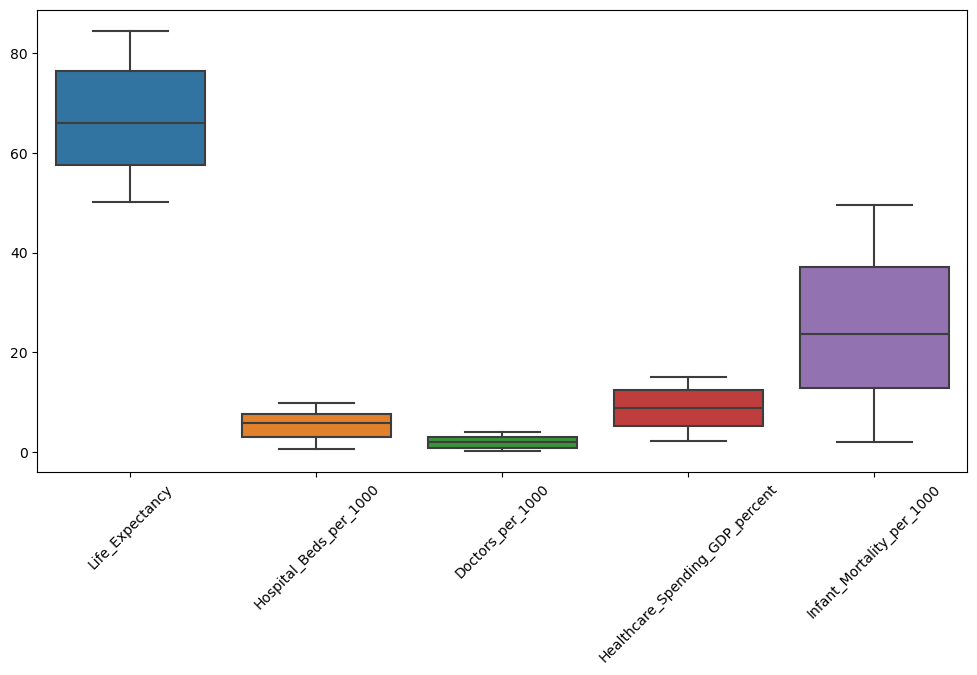

In [41]:
# Boxplot to check outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Life_Expectancy', 'Hospital_Beds_per_1000', 'Doctors_per_1000',
                     'Healthcare_Spending_GDP_percent', 'Infant_Mortality_per_1000']])
plt.xticks(rotation=45)
plt.show()

### Trends over the years

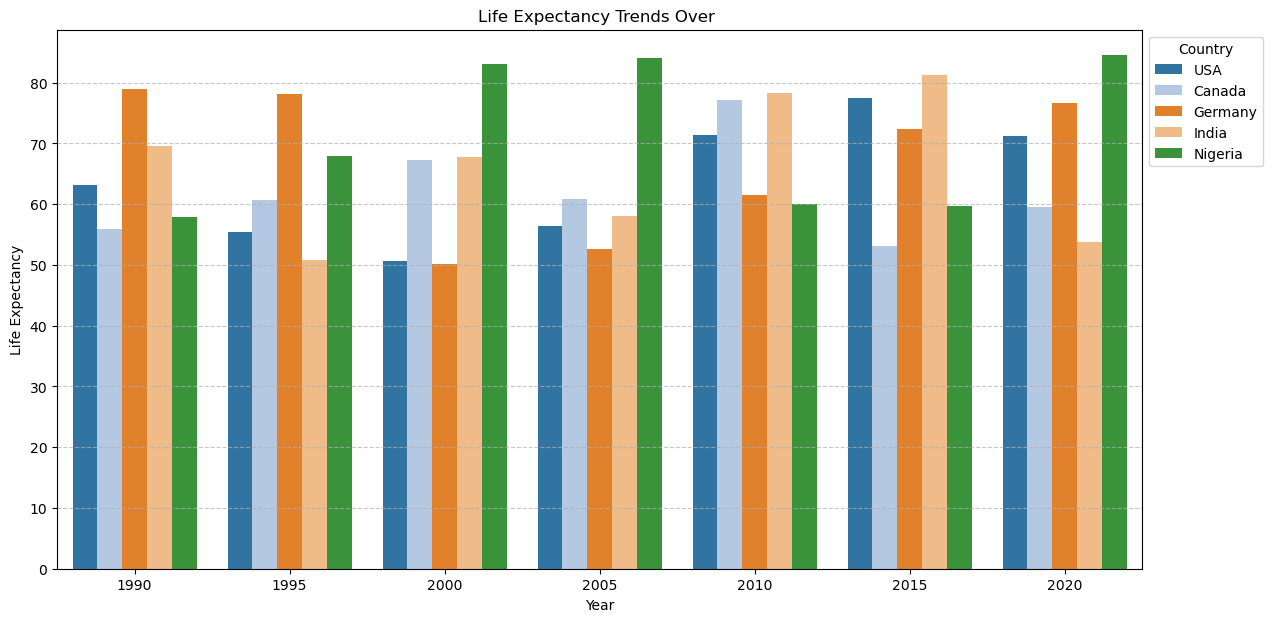

In [44]:
# Filter data for years in the dataset (every 5 years for clarity)
df_filtered = df[(df["Year"] >= df["Year"].min()) & (df["Year"] <= df["Year"].max())]
df_filtered = df_filtered[df_filtered["Year"] % 5 == 0]

# Create a grouped bar chart with custom colors
plt.figure(figsize=(14, 7))
sns.barplot(data=df_filtered, x="Year", y="Life_Expectancy", hue="Country", palette='tab20')

# Labels & Title
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Trends Over ")
plt.legend(title="Country", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### Correlation Analysis

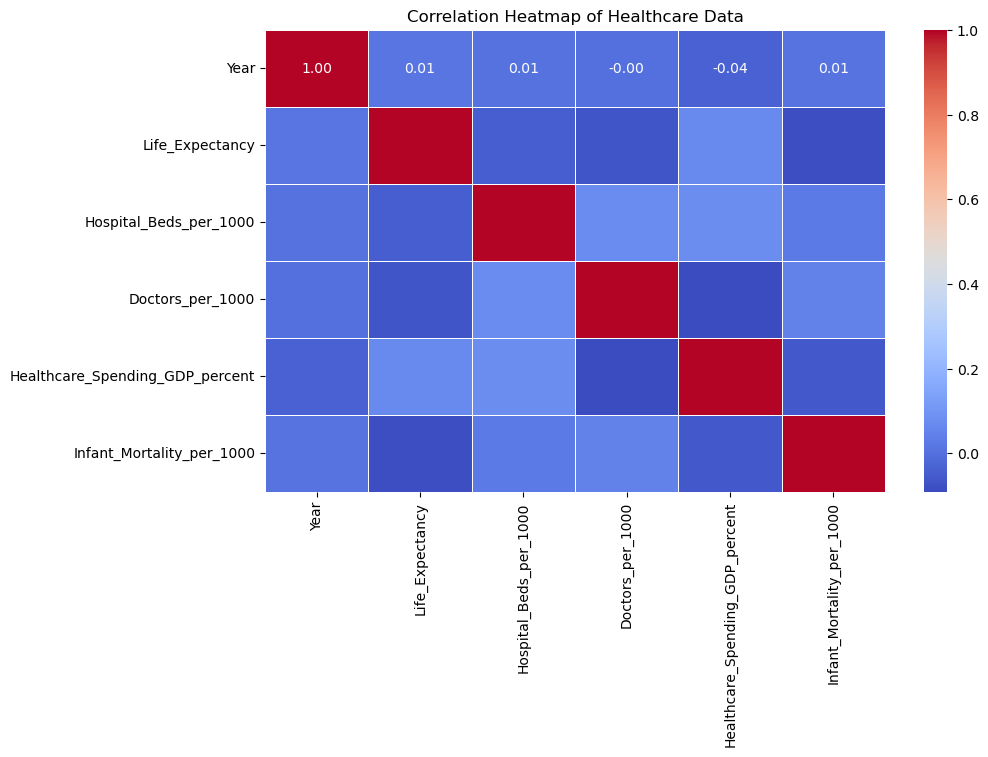

In [47]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Healthcare Data")
plt.show()

### Country Specific Analysis

#### Filter Data for Germany

In [51]:
# Select a specific country (e.g., 'Germany')
country_name = "Germany"
df_country = df[df["Country"] == country_name]

# Display the first few rows
df_country.head()

,Year,Country,Life_Expectancy,Hospital_Beds_per_1000,Doctors_per_1000,Healthcare_Spending_GDP_percent,Infant_Mortality_per_1000
62,1990,Germany,79.005813,7.591668,0.558883,5.554292,9.373492
63,1991,Germany,62.486366,6.671513,2.795426,2.732881,33.763518
64,1992,Germany,59.832708,8.567622,0.470517,13.241391,46.539423
65,1993,Germany,68.994363,6.747322,1.412107,12.567713,28.281382
66,1994,Germany,54.932348,5.898932,3.410526,14.996330,29.009022


#### Life Expectancy over the years

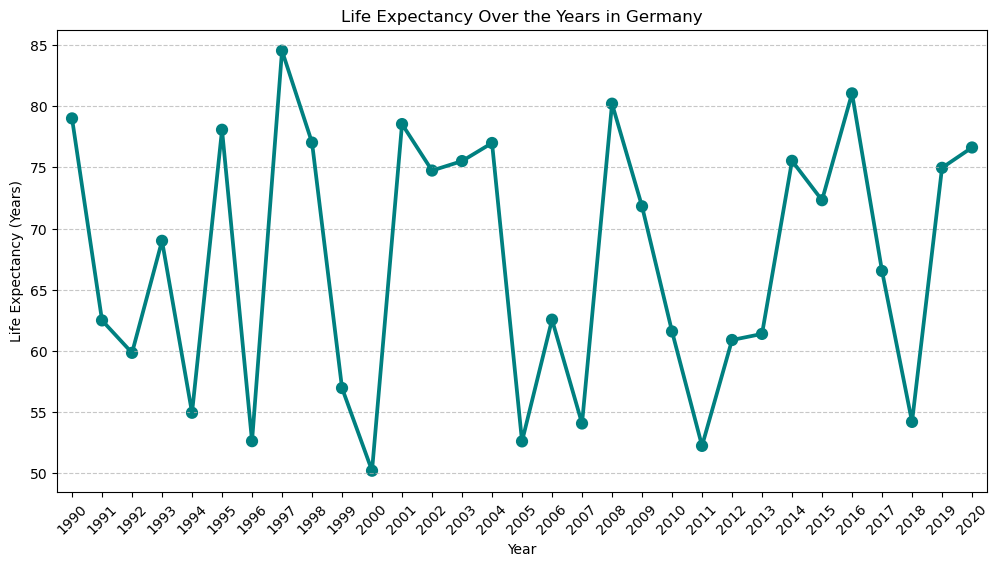

In [66]:
plt.figure(figsize=(12, 6))

sns.pointplot(data=df_country, x="Year", y="Life_Expectancy", color="teal", markers="o", linestyles="-")

plt.title(f"Life Expectancy Over the Years in {country_name}")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### Hospital Beds & Doctors per 1000

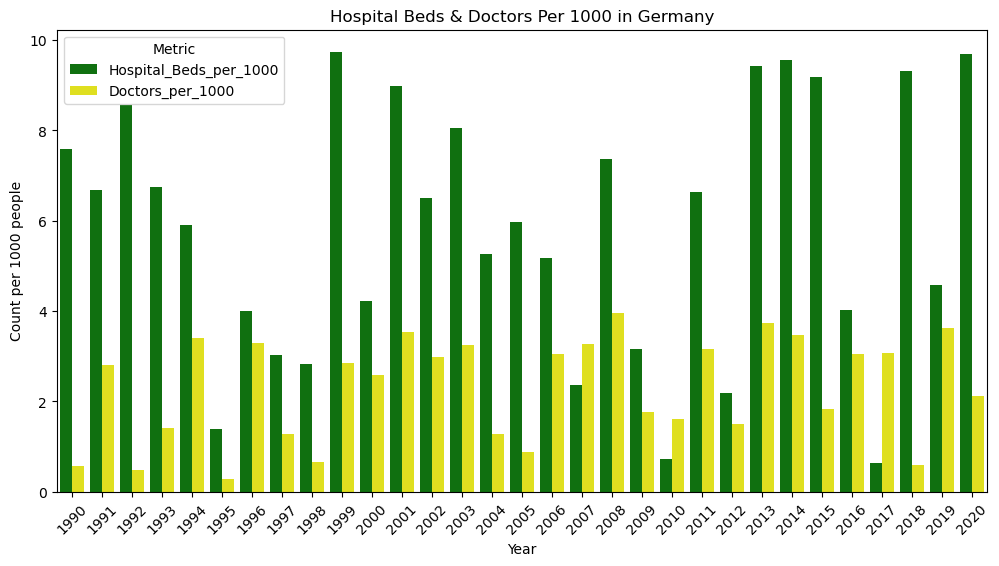

In [68]:
plt.figure(figsize=(12, 6))

# Convert "Year" to categorical to avoid issues with ordering
df_country["Year"] = df_country["Year"].astype(str)

# Create the bar plot
sns.barplot(data=df_country.melt(id_vars=["Year"], value_vars=["Hospital_Beds_per_1000", "Doctors_per_1000"]), 
            x="Year", y="value", hue="variable", palette=["green", "yellow"], dodge=True)

plt.title(f"Hospital Beds & Doctors Per 1000 in {country_name}")
plt.xlabel("Year")
plt.ylabel("Count per 1000 people")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.show()